# 05 — Fuzzy C-Means (FCM)
Fuzzy tagság alapú klaszterezés: minden ponthoz tagsági érték (0–1) 
tartozik minden klaszterre.  
Cél: összehasonlítani a “puha” és a “kemény” klaszterezést.


In [22]:
import os
import sys
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM

from src.datasets import make_all_datasets
from src.evaluation import evaluate
from src.visualization import pca_scatter, visualize_membership

datasets = make_all_datasets()
list(datasets.keys())

['blobs', 'moons', 'circles', 'iris']

In [23]:
def run_fcm_on_dataset(name, X, k, m=2.0):
    Xs = StandardScaler().fit_transform(X)
    fcm = FCM(n_clusters=k, m=m, random_state=42)
    fcm.fit(Xs)
    
    # Debug: nézzük meg az alakokat
    print(f"[{name}] fcm.u.shape = {fcm.u.shape}, X.shape = {X.shape}, k = {k}")
    
    # Az fcmeans library u mátrixa: (n_samples, n_clusters) formátumú
    # Minden sorban egy pont tagsági értékei vannak a klaszterekhez
    labels = np.argmax(fcm.u, axis=1)  # Minden ponthoz a max tagsági klaszter
    print(f"[{name}] labels.shape = {labels.shape}")
    
    m_eval = evaluate(Xs, labels)
    
    # Kemény klaszterezés vizualizáció
    pca_scatter(X, labels, f"{name} — FCM (k={k}, m={m}, sil={m_eval['sil']:.3f})")
    
    # Puha klaszterezés vizualizáció - tagsági mátrix
    print(f"[{name}] Calling visualize_membership...")
    visualize_membership(fcm, X, f"{name} — FCM membership (m={m})")
    
    return {"dataset": name, "algo": "fcm", "k": k, "m": m, **m_eval}

[blobs] fcm.u.shape = (800, 4), X.shape = (800, 2), k = 4
[blobs] labels.shape = (800,)


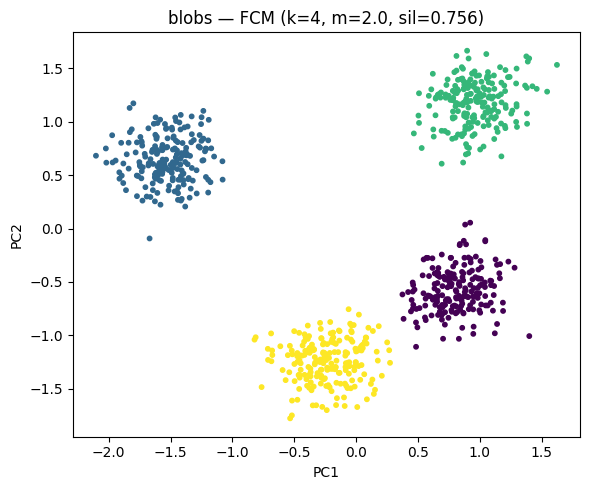

[blobs] Calling visualize_membership...


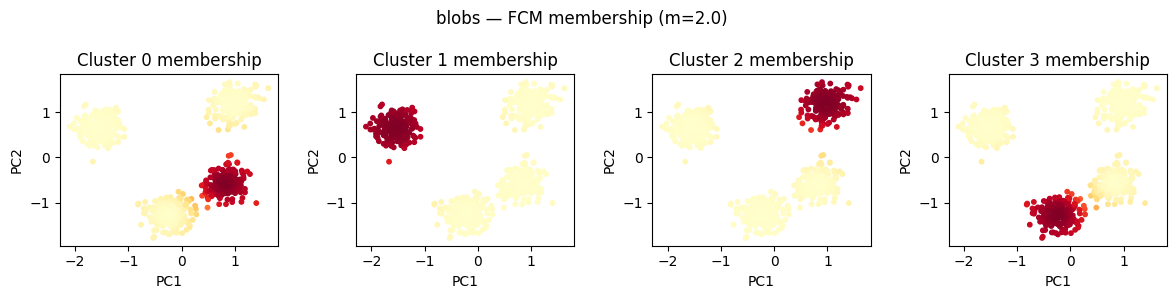

[moons] fcm.u.shape = (800, 2), X.shape = (800, 2), k = 2
[moons] labels.shape = (800,)


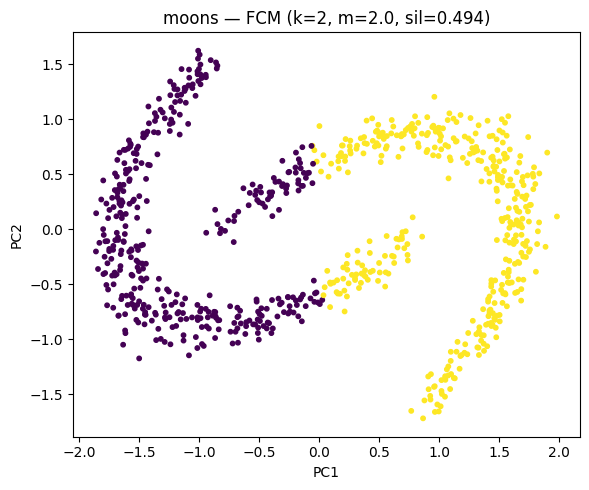

[moons] Calling visualize_membership...


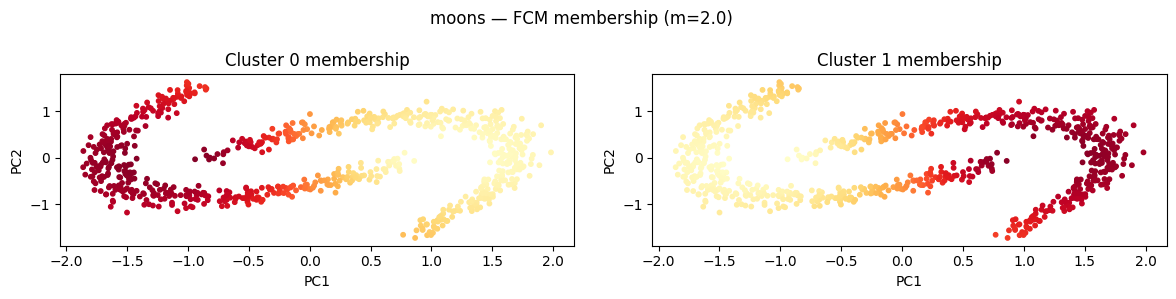

[circles] fcm.u.shape = (800, 2), X.shape = (800, 2), k = 2
[circles] labels.shape = (800,)


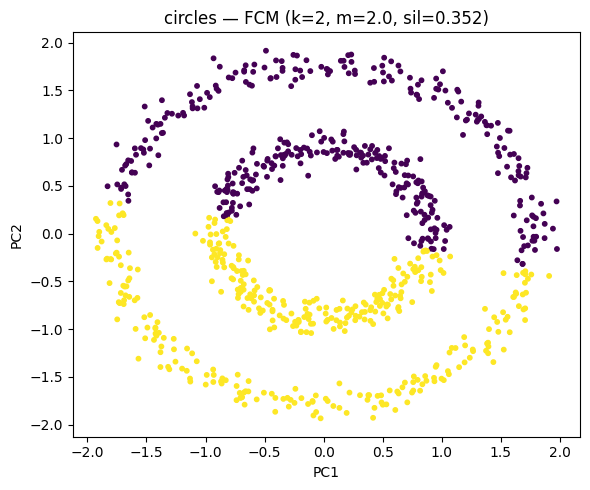

[circles] Calling visualize_membership...


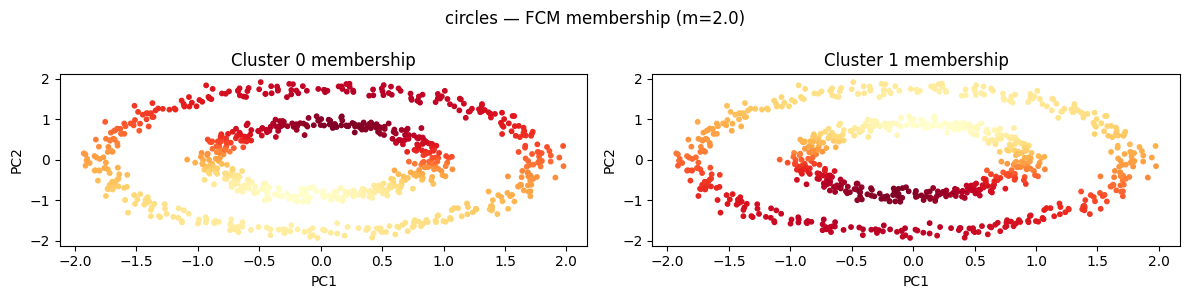

[iris] fcm.u.shape = (150, 3), X.shape = (150, 4), k = 3
[iris] labels.shape = (150,)


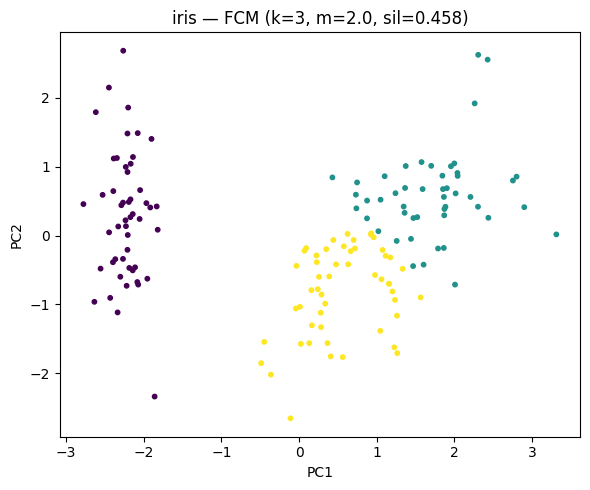

[iris] Calling visualize_membership...


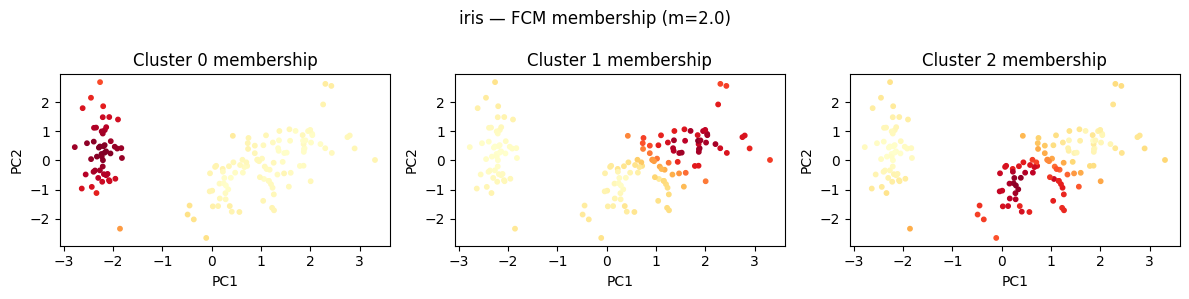

,dataset,algo,k,m,sil,db,ch
0,blobs,fcm,4,2.0,0.755672,0.339428,5937.966481
1,moons,fcm,2,2.0,0.494390,0.810730,1110.744872
2,circles,fcm,2,2.0,0.351909,1.188247,456.238426
3,iris,fcm,3,2.0,0.458442,0.834046,241.411256


Mentve: /Users/adombence/Projects/clustering-playground/results/tables/fcm.csv


In [ ]:
rows = []
for name, (X, y, k) in datasets.items():
    rows.append(run_fcm_on_dataset(name, X, k))

df = pd.DataFrame(rows)
display(df)

project_root = os.path.abspath("..")
os.makedirs(os.path.join(project_root, "results", "tables"), exist_ok=True)
out_path = os.path.join(project_root, "results", "tables", "fcm.csv")

df.to_csv(out_path, index=False)
